In [1]:
import math
from math import sqrt,log10, pow

from plot_intersections import plot_intersections, plot_segments


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib

from collections import defaultdict


In [2]:
def read_jsons(folders=[]):

    data = []
    # Read jsons files of build/semana03/circles with pathlib
    jsons = []
    for folder in folders:
        jsons += list(pathlib.Path(folder).glob("*.json"))
    
    jsons.sort()
    
    for json_file in jsons:
        print(json_file)
        with open(json_file, "r") as f:
            json_values = json.load(f)
            data.append(json_values)

    df = pd.DataFrame(data)
    df["case"] = df["container"] + "_" + df["event_container"]
    return df



In [18]:
dfs = []
df_pequenos = read_jsons(["../build/semana06/plot_01/"])
dfs.append(df_pequenos)

df_grandes = read_jsons(["../build/semana06/plot_big/"])
dfs.append(df_grandes)

df_grid = read_jsons(["../build/semana06/plot_grid/"])
dfs.append(df_grid)

df_random = read_jsons(["../build/semana06/plot_random_bkp/"])
dfs.append(df_random)

df_random_hash = read_jsons(["../build/semana06/plot_random_hash/"])
dfs.append(df_random_hash)

df = pd.concat(dfs)


../build/semana06/plot_01/nointersect_avl_list_1000000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000000_3.json
../build/semana06/plot_01/nointersect_avl_list_100000_1.json
../build/semana06/plot_01/nointersect_avl_list_100000_2.json
../build/semana06/plot_01/nointersect_avl_list_100000_3.json
../build/semana06/plot_01/nointersect_avl_list_10000_1.json
../build/semana06/plot_01/nointersect_avl_list_10000_2.json
../build/semana06/plot_01/nointersect_avl_list_10000_3.json
../build/semana06/plot_01/nointersect_avl_list_1000_1.json
../build/semana06/plot_01/nointersect_avl_list_1000_2.json
../build/semana06/plot_01/nointersect_avl_list_1000_3.json
../build/semana06/plot_01/nointersect_avl_list_100_1.json
../build/semana06/plot_01/nointersect_avl_list_100_2.json
../build/semana06/plot_01/nointersect_avl_list_100_3.json
../build/semana06/plot_01/nointersect_avl_list_10_1.json
../build/semana06/plot_01/nointersect_avl_l

In [4]:
default_palette = sns.color_palette("Dark2")


sns.set_theme(style="whitegrid")
hue_categories = df.container.unique()  
hue_colors = {category: color for category, color in zip(hue_categories, default_palette)}


## Sem interseção pequenos
 
 


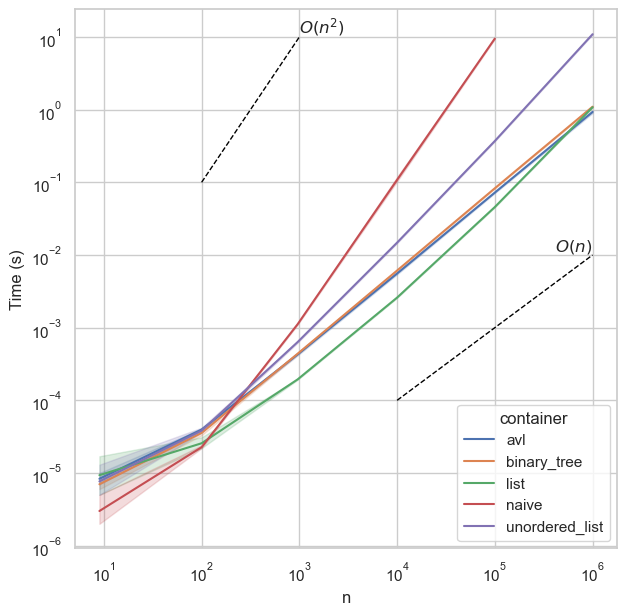

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_pequenos, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_small_detection_time.pdf")
plt.show()


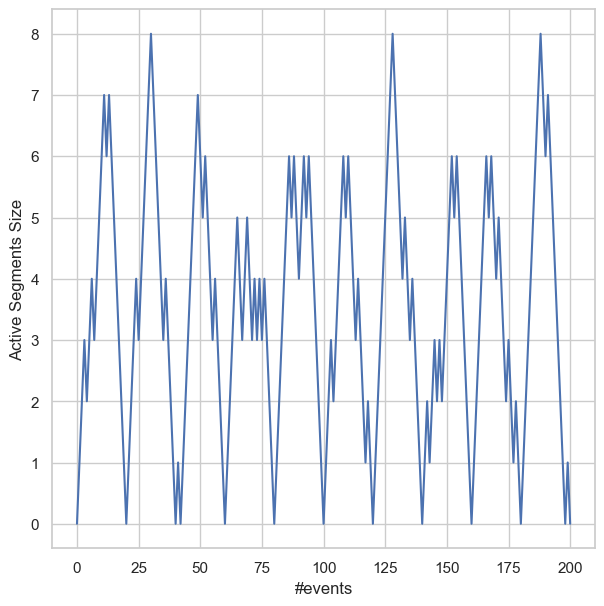

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
n = 100
ax.plot(df_pequenos[df_pequenos.n == n].iloc[0]['active_elements_size'])
ax.set_xlabel("#events")
ax.set_ylabel("Active Segments Size")

plt.savefig(f"./tex/figs/ativos/small_detection_segments_size_{n}.pdf", bbox_inches="tight")
plt.show()

## Segmentos grandes sem interseção

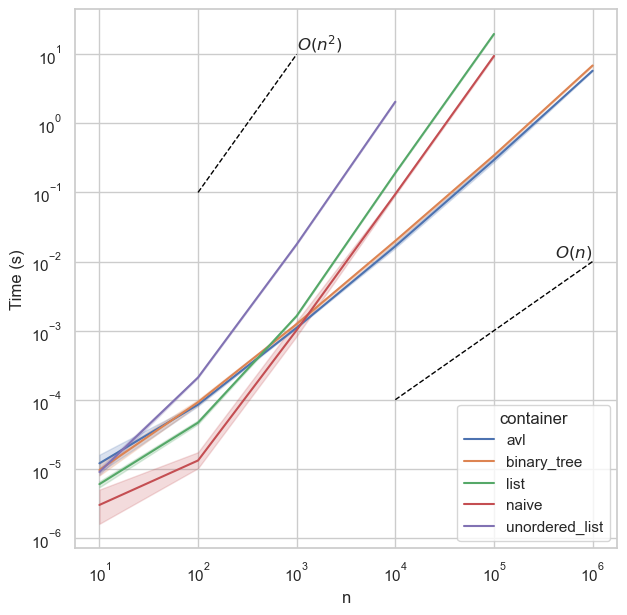

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grandes, x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]


ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [10000, 1000000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_big_detection_time.pdf")
plt.show()


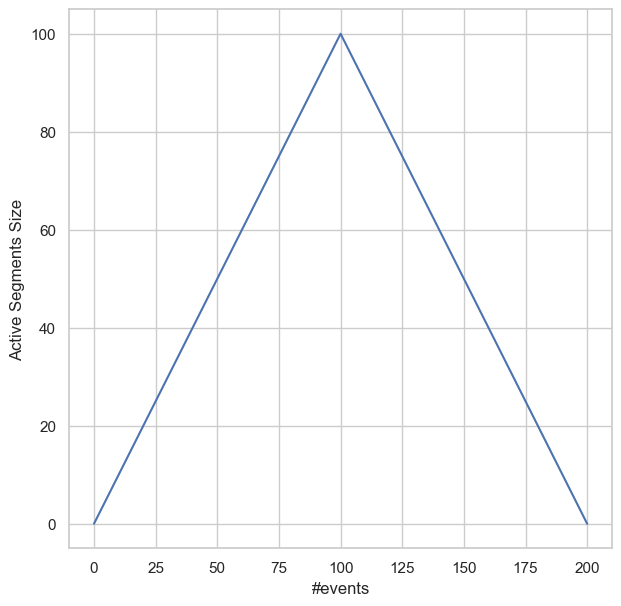

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
n = 100
ax.plot(df_grandes[df_grandes.n == n].iloc[0]['active_elements_size'])
ax.set_xlabel("#events")
ax.set_ylabel("Active Segments Size")

plt.savefig(f"./tex/figs/ativos/big_detection_segments_size_{n}.pdf", bbox_inches="tight")
plt.show()

## Grid Tests

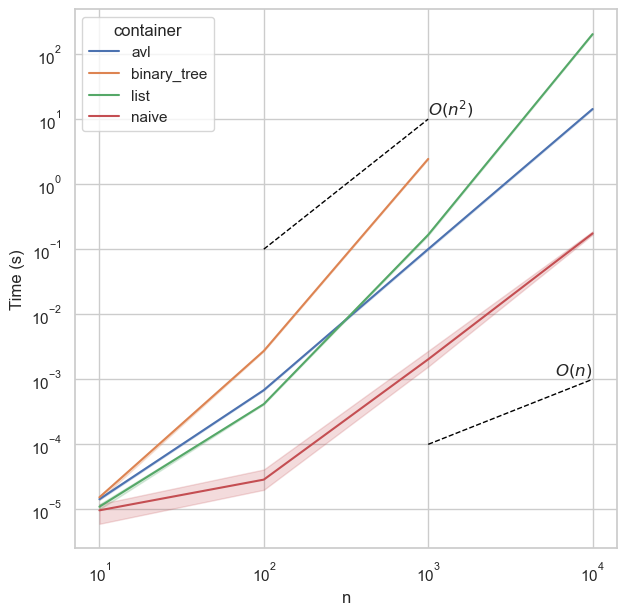

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.lineplot(data=df_grid[df_grid.event_container=="heap"], x="n", y="time", hue="container", ax=ax)

ax.set(xscale="log", yscale="log")
ax.set_ylabel("Time (s)")

y = 1e-1
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 1e-4
xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]

ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

plt.savefig("./tex/figs/tempos/plot_grid_time.pdf")
plt.show()


36.0   100.0
68.0   300.0
100.0   500.0
132.0   700.0
164.0   900.0
236.0   100.0
268.0   300.0
300.0   500.0
332.0   700.0
364.0   900.0
436.0   100.0
468.0   300.0
500.0   500.0
532.0   700.0
564.0   900.0
636.0   100.0
668.0   300.0
700.0   500.0
732.0   700.0
764.0   900.0
836.0   100.0
868.0   300.0
900.0   500.0
932.0   700.0
964.0   900.0


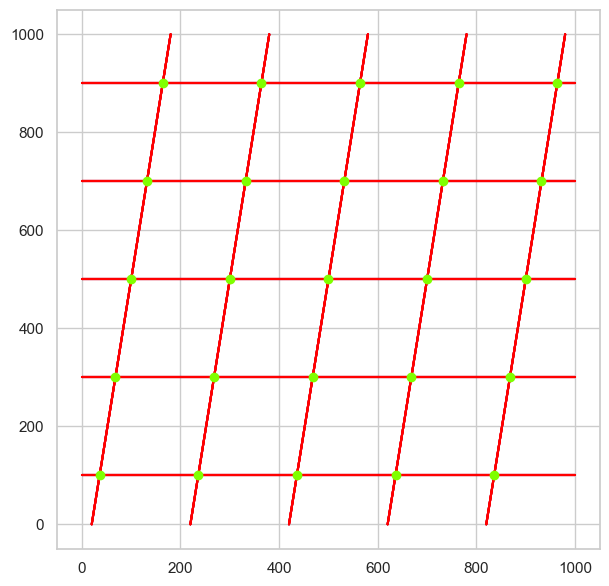

2.16   10.0
2.48   30.0
2.8   50.0
3.12   70.0
3.44   90.0
3.76   110.0
4.08   130.0
4.4   150.0
4.72   170.0
5.04   190.0
5.36   210.0
5.68   230.0
6.0   250.0
6.32   270.0
6.64   290.0
6.96   310.0
7.28   330.0
7.6   350.0
7.92   370.0
8.24   390.0
8.56   410.0
8.88   430.0
9.2   450.0
9.52   470.0
9.84   490.0
10.16   510.0
10.48   530.0
10.8   550.0
11.12   570.0
11.44   590.0
11.76   610.0
12.08   630.0
12.4   650.0
12.72   670.0
13.04   690.0
13.36   710.0
13.68   730.0
14.0   750.0
14.32   770.0
14.64   790.0
14.96   810.0
15.28   830.0
15.6   850.0
15.92   870.0
16.24   889.9999999999999
16.56   910.0
16.88   930.0
17.2   950.0
17.52   970.0
17.84   990.0
22.16   10.0
22.48   30.0
22.8   50.0
23.12   70.0
23.44   90.0
23.76   110.0
24.08   130.0
24.4   150.0
24.72   170.0
25.04   190.0
25.36   210.0
25.68   230.0
26.0   250.0
26.32   270.0
26.64   290.0
26.96   310.0
27.28   330.0
27.6   350.0
27.92   370.0
28.24   390.0
28.56   410.0
28.88   430.0
29.2   450.0
29.52   470.0
29

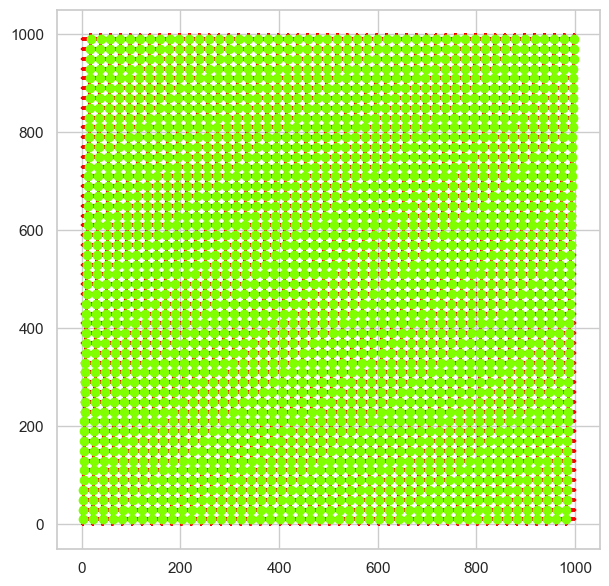

In [10]:

for n in [10, 100]:
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    row = df_grid[(df_grid.n==n) & (df_grid.container=="avl")].iloc[2]

    plot_segments(row.segments, ax, False)
    plt.savefig(f"tex/figs/exemplos/grid_example_{n}_segments.pdf", dpi=300)
    plot_intersections(row.segments, row.intersections, ax=ax)
    plt.savefig(f"tex/figs/exemplos/grid_example_{n}_interserctions.pdf", dpi=300)

    plt.show()

# Random Plots


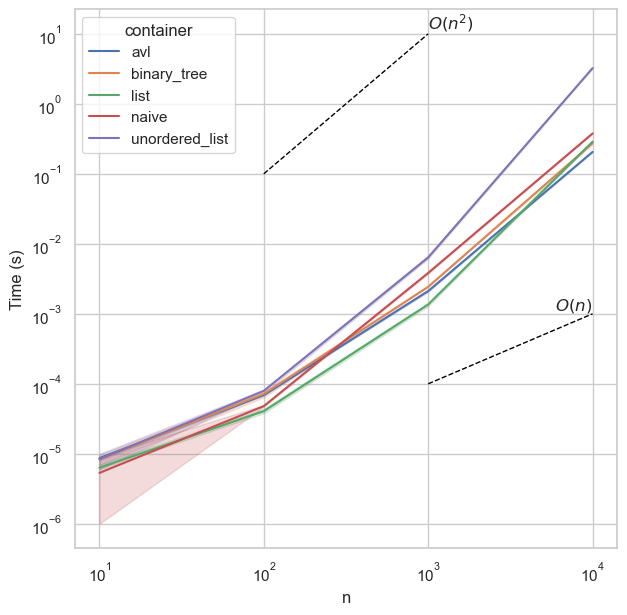

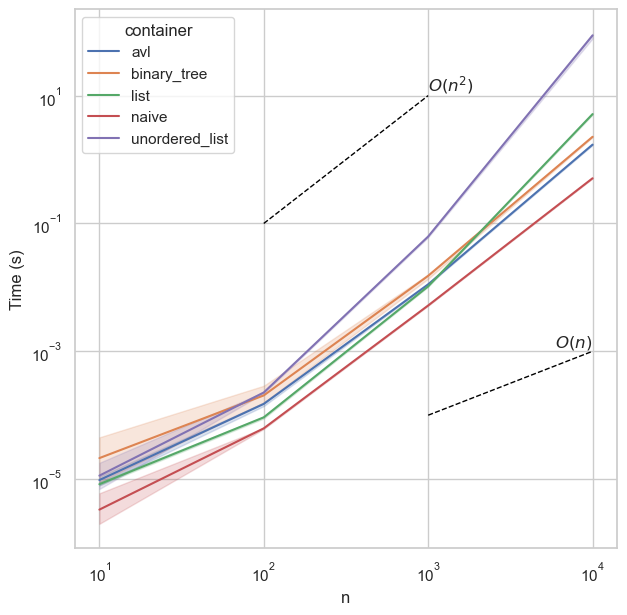

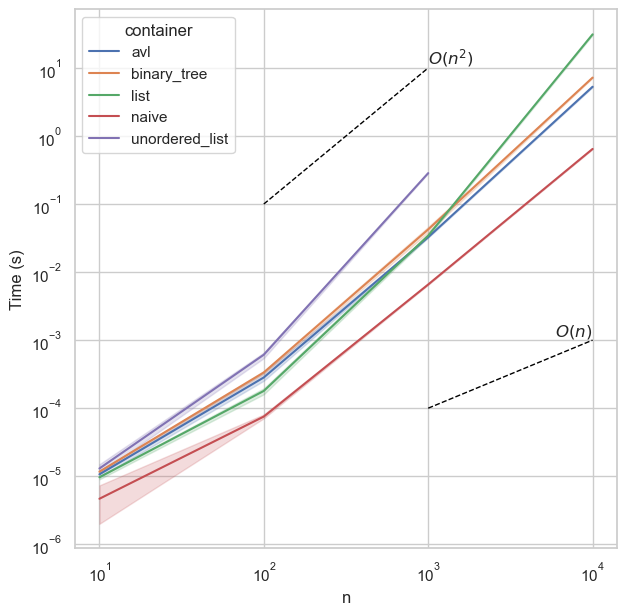

In [11]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.event_container=="heap") & (df_random.length == length)], x="n", y="time", hue="container", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")

    y = 1e-1
    xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]
    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

    y = 1e-4
    xs = [1000, 10000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]
    ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
    ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

    plt.savefig(f"./tex/figs/tempos/plot_random_{name}_time.pdf")
    plt.show()


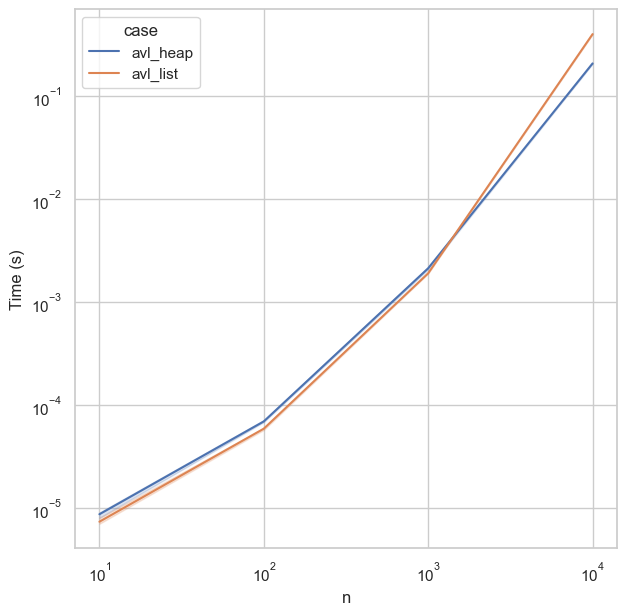

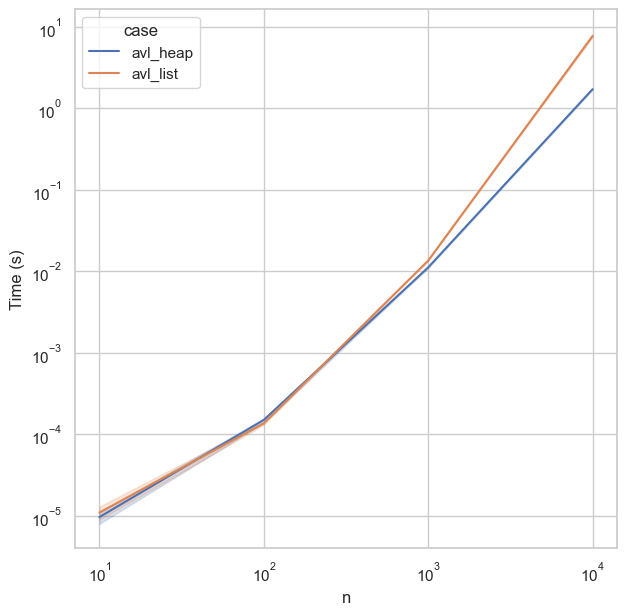

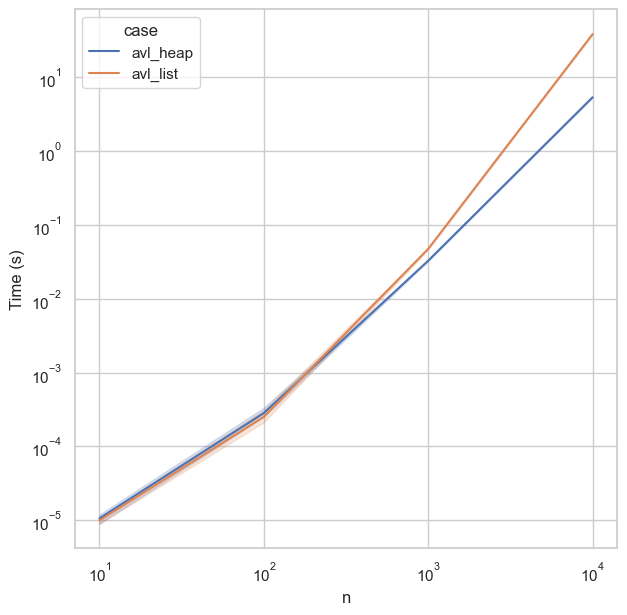

In [12]:
for length, name in zip([0.1, 0.3, 0.6], ["small", "medium", "big"]):
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    sns.lineplot(data=df_random[(df_random.container.isin(["avl"])) & (df_random.length == length)], x="n", y="time", hue="case", ax=ax)

    ax.set(xscale="log", yscale="log")
    ax.set_ylabel("Time (s)")


    plt.savefig(f"./tex/figs/tempos/heap_x_list_{name}.pdf")
    plt.show()


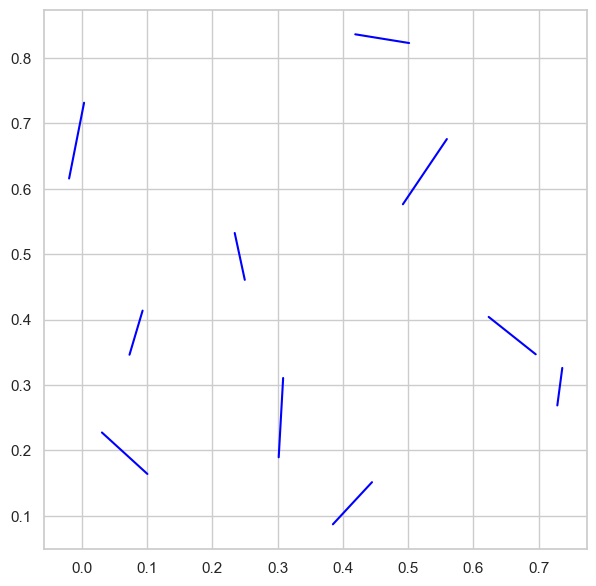

0.033211583684317446   0.6313030862401339
0.06781147006161871   0.7826977246581803
0.07012025819565881   0.8032870982949148
0.0788463192907256   0.8811046033376628
0.09100273132679373   0.24691350275737067
0.09241774553860714   0.5957386600818118
0.11422108170011216   0.8615331890938454
0.1271556358541698   0.790675608735379
0.13530315548177407   0.7704730795725416
0.15674945444319774   0.8036163549219401
0.1810515664757326   0.8142431506044343
0.1871854530123232   0.49452874123693447
0.19918363691698718   0.31238089578424844
0.21239494711058457   0.47411751327628515
0.24859837424406894   0.5611811441053198
0.26485528773292244   0.8301464384574085
0.2732986914965446   0.27503152430827527
0.2793733013302279   0.8024434969569617
0.2958729244992332   0.26365551684278066
0.29665824240137906   0.8502023953835132
0.30071606680143204   0.8527613887924457
0.3010504911716196   0.8477259258810727
0.3051716222662283   0.7856736215942328
0.30671370728548614   0.7624542852871823
0.3076401041469179 

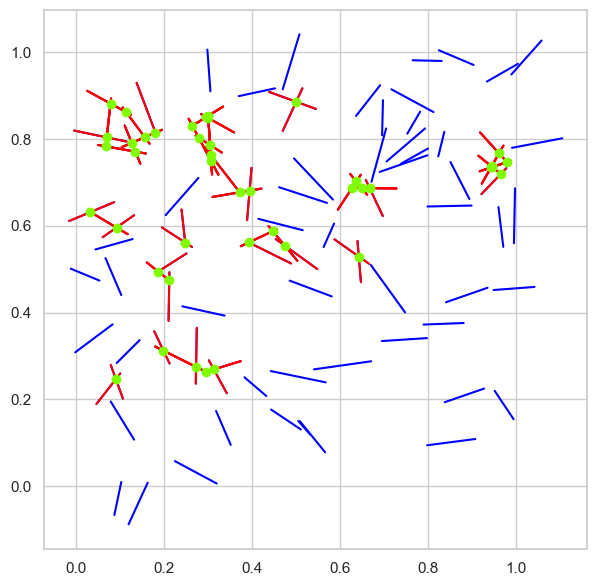

0.1052864105442544   0.5472279696516031
0.8405043576420252   0.711026816882246


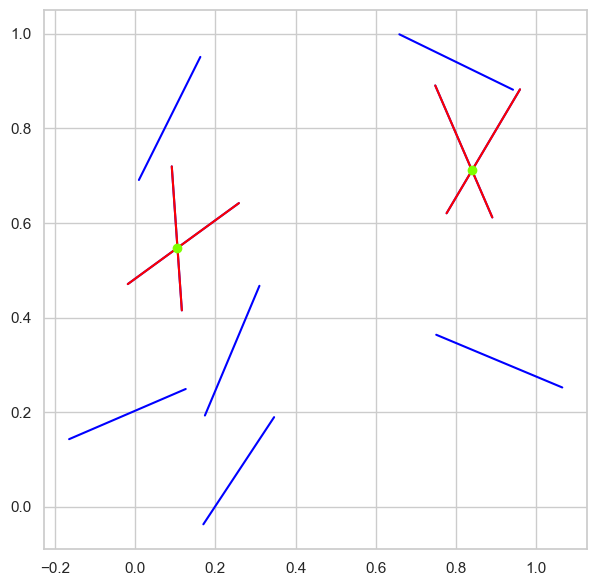

-0.08155844453016284   0.5314416804248103
-0.08082509129110041   0.5310647487301149
-0.08057708499562241   0.5315745746805325
-0.0012717867324818872   0.694602287272404
0.008504547380132507   0.27574618312323873
0.009814429327395593   0.2952576468002822
0.010675723044352003   0.30808712437936786
0.03970375849887043   0.07924678254160235
0.0517165775047775   0.270398058509069
0.09231497637602422   0.10975614848390575
0.09542988388300608   0.11937839650286347
0.10235583270635439   0.11557886410458257
0.11546636799877902   0.10838650607929044
0.1230976169215529   0.2048466772856734
0.1310246373037787   0.13220396965970466
0.14075070988702484   0.25937877444578283
0.15771231340857056   0.17305894788453258
0.1825111429346752   0.689998504776683
0.1959345259149695   0.23157163567053612
0.20907608126234759   0.6726851670790116
0.2130636174935272   0.17977856247728158
0.21900489109735582   0.6803754985302031
0.23500660198620066   0.1097474456041298
0.23638320554051806   0.12450647054780653
0.2

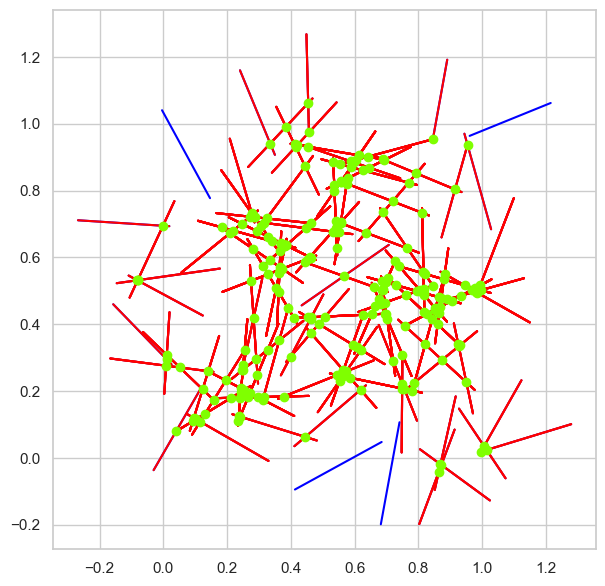

0.08933691868100711   0.3219073789241299
0.11312729701262379   0.5866654140810872
0.6835274602069709   0.08664549166126623


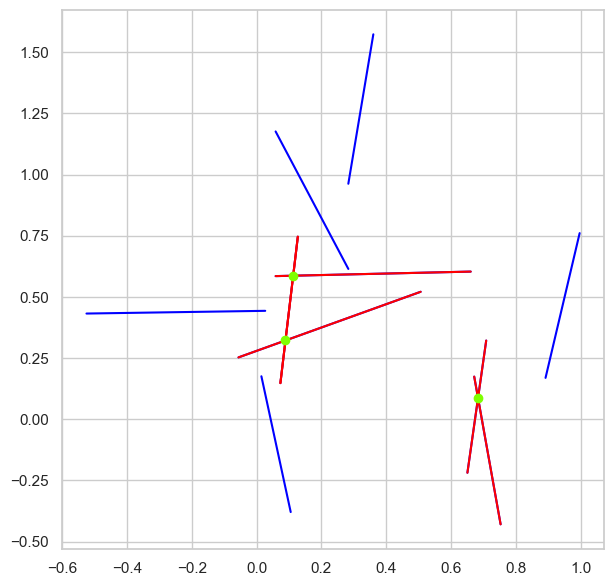

-0.3355519360356039   0.2030735068899534
-0.2893738564990901   0.669174659387044
-0.26020185587492317   0.24868995463820154
-0.2426202357390464   0.35507546400945755
-0.17641263304470814   0.2994154043915425
-0.07390427807193066   0.9334467251756476
-0.0598458502255125   0.43877208475881896
-0.05773463888801001   0.893767475799945
-0.038032628140966765   0.17005359566443845
-0.036755763442081445   0.8422866714992167
-0.029126208377415485   1.0090712682924945
-0.029079020180044157   1.0083855850973453
-0.028646483936266485   1.0082307519295792
-0.023028170217031265   0.9204617743325859
-0.022066314085419352   0.9064852161604743
-0.020180030729383697   0.16807224129168596
-0.018797819455566897   0.7982190377313346
-0.01735179669723208   0.8379794133030282
-0.014748425369884553   0.8001502935371615
-0.013765704440954733   0.7858705527539722
-0.01280220928202701   0.16112333878464308
-0.01204432525528391   0.16123263627211143
-0.011268659349246878   0.160580541817447
-0.007044618659685269 

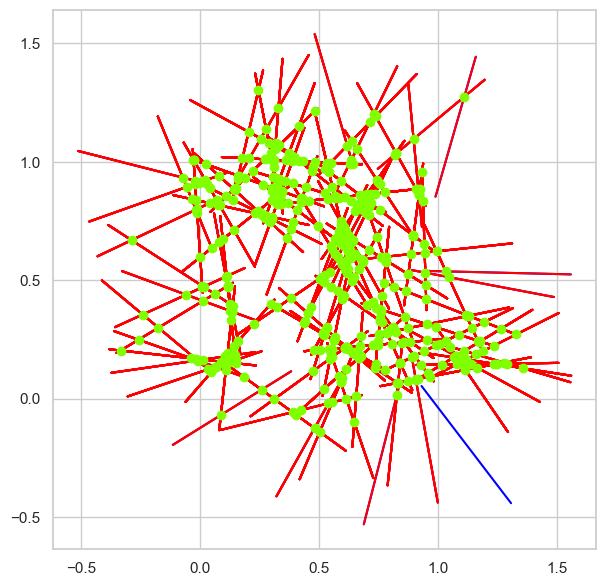

In [13]:
for length in [0.1, 0.3, 0.6]:
    for n in [10, 100]:
        fig, ax = plt.subplots(1, 1, figsize=(7, 7))

        row = df_random[(df_random.length==length) & (df_random.n==n) & (df_random.container=="avl")].iloc[2]

        plot_segments(row.segments, ax, False)
        plt.savefig(f"tex/figs/exemplos/random_example_{length}_{n}_segments.pdf", dpi=300)
        plot_intersections(row.segments, row.intersections, ax=ax)
        plt.savefig(f"tex/figs/exemplos/random_example_{length}_{n}_interserctions.pdf", dpi=300)

        plt.show()

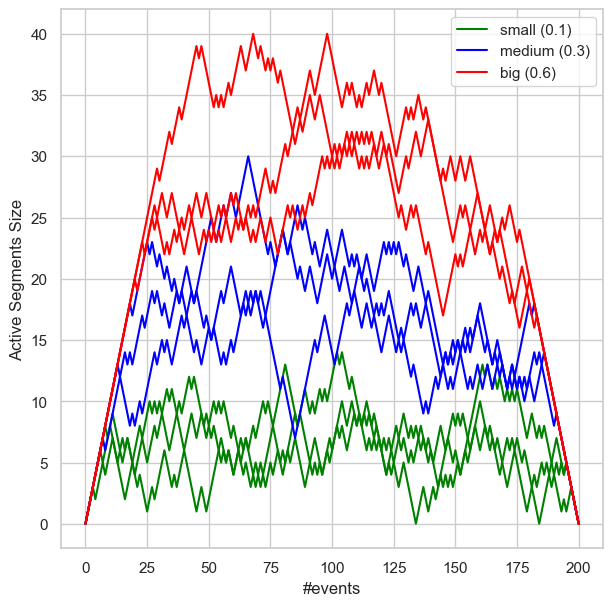

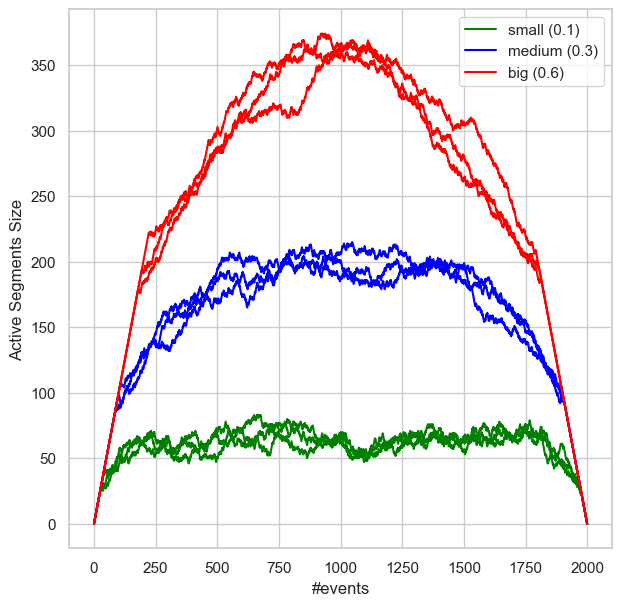

In [14]:
for n in [100, 1000]:
    fig, ax = plt.subplots(1, 1, figsize=(7,7))


    added = False
    for row in df[(df.length ==0.1) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="green", label="small (0.1)" if not added else None)
        added = True

    added = False
    for row in df[(df.length ==0.3) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="blue", label="medium (0.3)" if not added else None)
        added = True

    added = False
    for row in df[(df.length ==0.6) & (df.n == n) &(df.sort_case=="random_points") & (df.event_container=="heap") & (df.container=="list")].iterrows():
        ax.plot(row[1]['active_elements_size'], color="red", label="big (0.6)" if not added else None)
        added = True

    ax.legend()
    ax.set_xlabel("#events")
    ax.set_ylabel("Active Segments Size")

    plt.savefig(f"./tex/figs/ativos/active_segments_size_{n}.pdf", bbox_inches="tight")

# Aumento das interseções

In [15]:
df_inter = read_jsons(["../build/semana06/plot_nintersects/"])

../build/semana06/plot_nintersects/random_naive__0.1_10000_1.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_2.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_3.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_4.json
../build/semana06/plot_nintersects/random_naive__0.1_10000_5.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_1.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_2.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_3.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_4.json
../build/semana06/plot_nintersects/random_naive__0.1_1000_5.json
../build/semana06/plot_nintersects/random_naive__0.1_100_1.json
../build/semana06/plot_nintersects/random_naive__0.1_100_2.json
../build/semana06/plot_nintersects/random_naive__0.1_100_3.json
../build/semana06/plot_nintersects/random_naive__0.1_100_4.json
../build/semana06/plot_nintersects/random_naive__0.1_100_5.json
../build/semana06/plot_ni

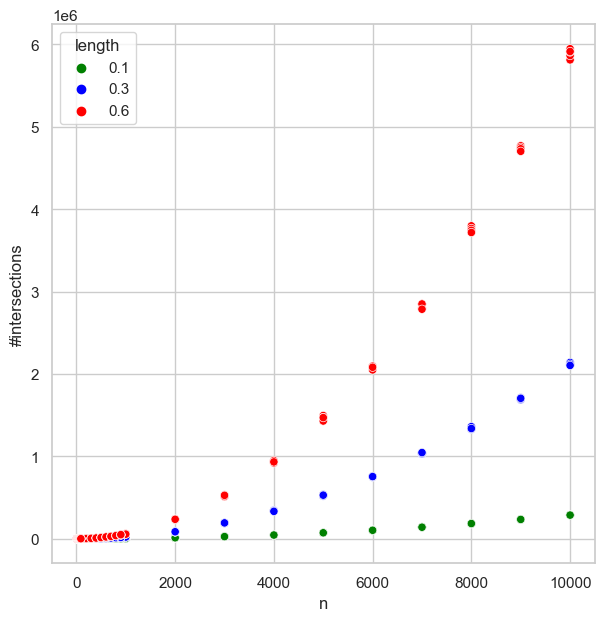

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(data=df_inter[df_inter.n_intersections > 0], x="n", y="n_intersections", ax=ax, hue="length", palette=["green", "blue", "red"])

ax.set_ylabel("#intersections")
plt.savefig("tex/figs/exemplos/n_intersections.pdf", bbox_inches="tight")


plt.show()
plt.close()

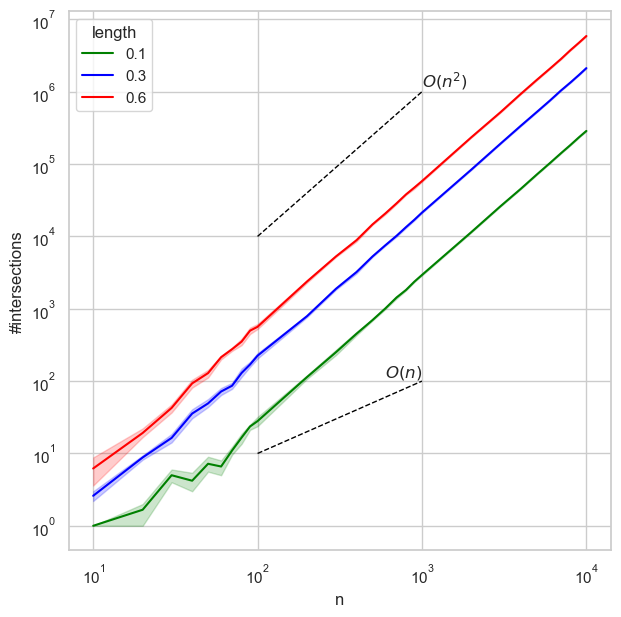

In [17]:

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df_inter[df_inter.n_intersections > 0], x="n", y="n_intersections", ax=ax, hue="length", palette=["green", "blue", "red"])

ax.set(xscale="log", yscale="log")

y = 10000
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*2)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

y = 10
xs = [100, 1000]; ys = [y, y*pow(10, log10(xs[1]/xs[0])*1)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom", horizontalalignment="right")

ax.set_ylabel("#intersections")

plt.savefig("tex/figs/exemplos/n_intersections_log.pdf", bbox_inches="tight")
plt.show()
plt.close()

# Comparação hash


In [19]:
df_random_hash["container"] = df_random_hash["container"] + "_hash"

In [32]:
df_compare = pd.concat([df_random, df_random_hash])
df_compare = df_compare[(df_compare.event_container=="heap") & (df_compare.container.str.isin(["avl", "avl_hash", "naive"]))]

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df_compare[(df_compare.length==0.6) ], x="n", y="time", hue="container")
ax.set(xscale="log", yscale="log")
plt.show()




AttributeError: 'StringMethods' object has no attribute 'isin'